/Users/tom/miniconda3/envs/thesis/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


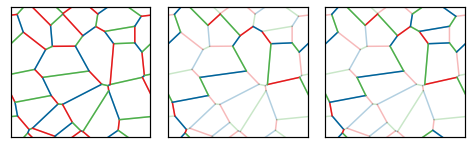

In [1]:
#!/usr/bin/env python3

import matplotlib
from matplotlib.colors import to_rgba, to_hex
from matplotlib import cm
from matplotlib.collections import LineCollection
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
import numpy as np
import pickle
import scipy.stats
from pathlib import Path

from koala import plotting as pl
from koala import phase_diagrams as pd
from koala import pointsets, voronization, flux_finder, graph_color
from koala import example_graphs as eg

# imports just for this plot
from scipy.spatial import Voronoi, voronoi_plot_2d

column_width = 3.375
w = 3.375
black_line_widths = 1.2

matplotlib.rcParams.update({'font.size': 13, 'text.usetex': True, 'font.family': 'serif', 'font.serif': ['Computer Modern']})
matplotlib.rcParams.update({"axes.linewidth": black_line_widths})

# Modified RGB color scheme
bond_colors = """" 
#e41a1c
#4daf4a
#00639a
""".split()[1:]

line_colors = [to_hex(a) for a in cm.inferno([0.25, 0.5, 0.75])]

grid_style = dict(linewidths = black_line_widths, linestyle = '-', colors = 'k', alpha = 0.2)

margin = 0.2 # how much of the other unit cells to show

fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(2 * w, 2/3 * w)

## Computations
n_points = 20
rng = np.random.default_rng(4242423)
points = rng.uniform(size=(n_points,2))
voro = Voronoi(points)
lattice = voronization.generate_lattice(points, shift_vertices = False)
# coloring = graph_color.color_lattice(lattice)
solveable, colorings = graph_color.edge_color(lattice, n_colors = 3, n_solutions = 3)
# gs_flux_sector = np.array([eg.ground_state_ansatz(p.n_sides) for p in lattice.plaquettes], dtype = np.int8)
# ujk = flux_finder.find_flux_sector(lattice, gs_flux_sector)


def panel(ax, coloring, highlight):
    ax.set(xticks = [], yticks = [])
    pl.plot_edges(lattice, ax = ax, labels = coloring, color_scheme = bond_colors, alpha = 0.3)
    pl.plot_edges(lattice, ax = ax, subset = highlight, labels = coloring, color_scheme = bond_colors)
    

colorings = list(colorings)
base = colorings[0]
diffs = [np.where(coloring != base)[0] for coloring in colorings]
diffs[0] = np.arange(lattice.n_edges, dtype = int)

for ax, coloring, diff in zip(axes, colorings, diffs):
    panel(ax, coloring, highlight = diff)


fig.tight_layout()
# fig.subplots_adjust(left = 0.01, wspace=.05, right = 1 - 0.01, top = 1 - 0.01, bottom = 0.01)

# fig.savefig(f'./{Path.cwd().name}.pdf')
# fig.savefig(f'./{Path.cwd().name}.svg', transparent = True)



In [4]:
#!/usr/bin/env python3
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

from koala import plotting as pl
from koala import phase_diagrams as pd
from koala import pointsets, voronization, flux_finder, graph_color
from koala import example_graphs as eg
from koala.flux_finder import pathfinding

# imports just for this plot
from scipy.spatial import Voronoi, voronoi_plot_2d

column_width = w = 3.375
black_line_widths = 1.2

import sys, os
sys.path.append(os.path.expanduser('~/git/Thesis/figure_code'))
from plot_settings import bond_colors, line_colors, plaq_color_scheme

matplotlib.rcParams.update({
    "font.size": 12,
    "text.usetex": True,
    "axes.linewidth": 1.2,
    'font.family': 'serif',
    'font.serif': ['cmr10'],
    'font.weight': 'ultralight',
    "axes.formatter.use_mathtext" : True,
})

rng = np.random.default_rng(222424252565)



# fig.tight_layout()
# fig.subplots_adjust(left = 0.01, wspace=.05, right = 1 - 0.01, top = 1 - 0.01, bottom = 0.01)

fig.savefig(f'./{Path.cwd().name}.pdf')
fig.savefig(f'./{Path.cwd().name}.svg', transparent = False)


FileNotFoundError: missing font metrics file: cmr12

In [11]:
from matplotlib.texmanager import TexManager
texmanager = TexManager()
s = r"\TeX\ is $\displaystyle\sum_n\frac{-e^{i\pi}}{2^n}$!"
Z = texmanager.make_dvi(s, fontsize=12)

RuntimeError: Failed to process string with tex because latex could not be found

In [12]:
from matplotlib.colors import to_rgba

cdw_color = to_rgba('#f09000')
gapped_color = to_rgba('#00afdb')
gapless_color = to_rgba('#e1a3f0')

#Sohpie's colour scheme
gapped_color = colors[3]
gapless_color = colors[-1]

#gapless_color = '#75c9f0' #light blue
#gapless_color = '#ea623b' #half way between cdw orange and colors[3]

# %%

cdw_gapped_midpoint = np.mean([cdw_color, gapped_color], axis = 0)

Tc = 2.25

from scipy.interpolate import interp1d, UnivariateSpline

def binder(ax):
    with open(data_location / 'binder_data.pickle', 'rb') as file: 
        d = oBinder = Munch(pickle.load(file))
    
    for i, N, c in zip(count(), d.Ns, colors):
        d.dB[i] = np.maximum(d.dB[i], d.dB[i].mean() * 0.1)
        binder_interped = UnivariateSpline(d.BX, d.B[i], w = 1/d.dB[i], s = len(d.BX))
        x = np.linspace(d.BX[0], d.BX[-1], 200)
        ax.plot(x, binder_interped(x), color = c)
        
    ax.set_ylabel('B', rotation=0, labelpad=5)
    ax.set_xlabel('T', rotation=0, labelpad=5)
        
        
def orderparam(ax):
    with open(data_location / 'binder_data.pickle', 'rb') as file: 
        d = oBinder = Munch(pickle.load(file))
    
    with open(data_location / 'fermion_binder_data.pickle', 'rb') as file: 
        fermion = Munch(pickle.load(file))
    
    for i, N, c in zip(count(), d.Ns, colors):
        d.dM2[i] = np.maximum(d.dM2[i], d.dM2[i].mean() * 0.1)
        M_interped = UnivariateSpline(d.MX, d.M2[i], w = 1/(d.dM2[i] + 0.01*max(d.dM2[i])), s = len(d.MX))
        #axes[0].plot(d.MX, d.M2[i], linewidth = 1, color = c)
        #axes[0].errorbar(d.MX, d.M2[i], yerr = d.dM2[i] * 2, color = c, linestyle = "None", marker = '|', markersize = 0.5, label = f'N = {N}')

        x = np.linspace(d.MX[0], d.MX[-1], 200)
        ax.plot(x, M_interped(x), color = c)
        
        fermion.do[i] = np.maximum(fermion.do[i], fermion.do[i].mean() * 0.1)
        o_interped = UnivariateSpline(d.MX, fermion.o[i], w = 1/fermion.do[i], s = len(d.MX))
        ax.plot(x, 1 - o_interped(x), color = c,linestyle = '--')
        #spread(axes[0], d.MX, d.M2[i], d.dM2[i], alpha = 0.3, label = f'N = {N}', color = color)
        
#         ax.set_ylabel('$m^2$', rotation=0, labelpad=7)
        ax.set_xlabel('T', rotation=0, labelpad=5)

def TJ_phase_diagram_T(ax):
    with open(data_location / 'TJ_phase_data.pickle', 'rb') as file: 
        TJ_data = pickle.load(file)   
        
    
    with open(data_location / 'TJ_phase_cdw_line.pickle', 'rb') as file: 
        crit_line = Munch(pickle.load(file))

    crit_fit_line = Munch(Ts = crit_line.fit.a*TJ_data.Js + crit_line.fit.b, Js = TJ_data.Js)
    crit_fit_line =  Munch(Ts = np.insert(crit_line.Ts, 1, 0), Js = np.insert(crit_line.Js, 1, 0))
    
    
    ax.fill_betweenx(crit_fit_line.Js, x1 = 0, x2 = crit_fit_line.Ts, color = cdw_color)
    ax.fill_between(crit_fit_line.Ts, crit_fit_line.Js, color = gapped_color)
    ax.plot(crit_fit_line.Ts, crit_fit_line.Js,  color = 'black', marker = None, markersize = 0, linewidth = 1, linestyle = 'solid')
    
    ax.plot(crit_line.Ts, crit_line.Js,  color = 'black', marker = '.', markersize = 2, linewidth = 0)
    ax.errorbar(crit_line.Ts, crit_line.Js, xerr = crit_line.dTs, color = 'k', linewidth = 0.5, capsize = 1, linestyle = '')
        
    
    #pcol.set_edgecolor('face')
    ax.set(xlim = (0.1, 5), ylim = (0,10))
    ax.set_ylabel('J', rotation=0, labelpad=5)
    ax.set_xlabel('T', rotation=0, labelpad=5)
    
    ax.text(0.15, 0.8, "CDW", transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top')

    ax.text(0.6, 0.35, "Mott", transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top')

def TU_phase_diagram_T(ax):
    with open( data_location / 'TU_phase_data.pickle', 'rb') as file: 
        TU_data = pickle.load(file)   
        
    with open(data_location / 'TU_phase_gap_gapless_line.pickle', 'rb') as file: 
        gapped_gapless_line = Munch(pickle.load(file))
    
    with open(data_location / 'TU_phase_cdw_line.pickle', 'rb') as file: 
        cdw_line = Munch(pickle.load(file))
    
    
    from matplotlib.colors import LinearSegmentedColormap
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    colors = [(1,1,1,1), cdw_color]
    cmap = LinearSegmentedColormap.from_list("mycmap", colors)

    #### Critical Lines ################
    try:
        ix = gapped_gapless_line.T > p.Tc
        
        #tack on an extra point to the gap-gappless critical line to make it meet the cdw line
        gapped_gapless_line.U = np.concatenate([[gapped_gapless_line.U[ix][0]], gapped_gapless_line.U[ix]])[::2]
        gapped_gapless_line.T = np.concatenate([[p.Tc,], gapped_gapless_line.T[ix]])[::2]
        gapped_gapless_line.dU = np.concatenate([[gapped_gapless_line.dU[ix][0]], gapped_gapless_line.dU[ix]])[::2]
    
        ax.plot(gapped_gapless_line.T, gapped_gapless_line.U, color = 'black', marker = '.', markersize = 2, linewidth = 1)
        ax.errorbar(gapped_gapless_line.T, gapped_gapless_line.U, yerr = gapped_gapless_line.dU, color = 'k', linestyle = '')
        
        ax.plot(cdw_line.T, cdw_line.U,  color = 'black', marker = '.', markersize = 2, linewidth = 1)
        ax.errorbar(cdw_line.T, cdw_line.U, xerr = cdw_line.dT, color = 'k', linestyle = '', capsize = 1, linewidth = 1)
        
        #make a polygon for the gapped region starting from top right corner
        #               top right                   left edge                             bottom edge           bottom right
        T = np.concatenate([[5,], cdw_line.T[cdw_line.U > gapped_gapless_line.U[0]][::-1], gapped_gapless_line.T, [5,]])
        U = np.concatenate([[8,], cdw_line.U[cdw_line.U > gapped_gapless_line.U[0]][::-1], gapped_gapless_line.U, [4,]])
        xy = np.array([T,U]).T
        poly = mpl.patches.Polygon(xy, closed=True, fill=True, facecolor = gapped_color, edgecolor = None)
        ax.add_artist(poly)
        
        #make a polygon for the gappless region starting from top left
        #               
        T = np.concatenate([cdw_line.T[cdw_line.U < gapped_gapless_line.U[0]][::-1], [5,5], gapped_gapless_line.T[::-1]])
        U = np.concatenate([cdw_line.U[cdw_line.U < gapped_gapless_line.U[0]][::-1], [0,4], gapped_gapless_line.U[::-1]])
        xy = np.array([T,U]).T
        poly = mpl.patches.Polygon(xy, closed=True, fill=True, facecolor = gapless_color, edgecolor = None)
        ax.add_artist(poly)
        
        #make a polygon for the cdw region starting from top left
        #               
        T = np.concatenate([[0,0], cdw_line.T])
        U = np.concatenate([[8,0],cdw_line.U])
        xy = np.array([T,U]).T
        poly = mpl.patches.Polygon(xy, closed=True, fill=True, facecolor = cdw_color, edgecolor = None)
        ax.add_artist(poly)
        
        
    except AssertionError:
        pass

    ##### labels and limits ##########################
    ax.set_ylabel('U', rotation=0, labelpad=5)
    ax.set_xlabel('T', rotation=0, labelpad=5)
    
    ax.set(ylim = (0,8), xlim = (0.1,5))

    ##### U = 0 line ##########################
    ax.hlines([0,],xmin = 0, xmax = 5,
                   linewidth = 4, color = 'black', 
                   linestyle = 'solid',
                   alpha = 0,
                   )

    ##### Text ##########################
#     x = 0.1; y = 0.2
#     ax.text(x, y, "FG", transform=ax.transData,
#         fontsize=7, fontweight='normal', va='bottom', ha = 'left')
    
#     ax.arrow(x+0.7, y+0.6, dx = 0, dy = -0.53,
#         width = 0.06, linewidth = 0.005, color = 'k',
#         transform=ax.transData,
#         zorder = 100,
#         )

    ax.text(1, 4, "CDW", transform=ax.transData,
            fontsize=7, fontweight='normal', va='center', ha = 'center')

    ax.text((Tc+5)/2, 6, "Mott", transform=ax.transData,
            fontsize=7, fontweight='normal', va='center', ha = 'center')
    
    ax.text((Tc+5)/2, 2, "Anderson", transform=ax.transData,
        fontsize=7, fontweight='normal', va='center', ha = 'center')
    

f, axes = plt.subplots(2,2, gridspec_kw = dict(wspace = 0.05, hspace = 0.05))
axes = axes.flatten()
    
#the point at the binder crossing
p = Munch(J = 5, U = 5)

with open(data_location / 'TJ_phase_cdw_line.pickle', 'rb') as file: 
    crit_line = Munch(pickle.load(file))
p.Tc = crit_line.fit.a*5 + crit_line.fit.b

with open(data_location / 'binder_data.pickle', 'rb') as file: 
    d = oBinder = Munch(pickle.load(file))
p.B = np.interp(p.Tc, d.BX, d.B[-1]) 
p.m2 = np.interp(p.Tc, d.MX, d.M2[-1])
    
TJax = axes[0]
TUax = axes[1]
m2ax = axes[2]
binderax = axes[3]


##### The PT diagrams
TJ_phase_diagram_T(TJax)
TU_phase_diagram_T(TUax)
binder(binderax)
orderparam(m2ax)

## the triangular critical point marker
m = Munch(marker = '^', markersize = 2, color = 'black')
binderax.plot([p.Tc,], [p.B,], **m)
m2ax.plot([p.Tc,], [p.m2,], **m)
TJax.plot([p.Tc,], [p.J,], **m)
TUax.plot([p.Tc,], [p.U,], **m)

#### the M2 plot #####

#The m2 plot
m2ax.set(xlim = (0,4),
            xticks = [0,1,2,3],
            yticks = [0, 0.5, 1],
            yticklabels = ['0', '.5', '1']
            )

# startx = 1.6; starty = 0.19;
# endx = 2; endy = 0.2;
# m2ax.arrow(startx, starty, endx-startx, endy-starty, width = 0.01, linewidth = 0.001, color = 'k')
# m2ax.text(startx-0.05, starty, 'N = 250', fontsize = 7, ha = 'right', va = 'center')

# startx = 2.5; starty = 0.57;
# endx = 2.15; endy = 0.56;
# m2ax.arrow(startx, starty, endx-startx, endy-starty, width = 0.01, linewidth = 0.001, color = 'k')
# m2ax.text(startx+0.05, starty, 'N = 10', fontsize = 7, ha = 'left', va = 'center')


######## Things that depend on where the axis is rather than what is on it
axes[0].xaxis.tick_top()
axes[0].xaxis.set_label_position("top")

axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")

axes[1].xaxis.tick_top()
axes[1].xaxis.set_label_position("top")
    
axes[3].yaxis.tick_right()
axes[3].yaxis.set_label_position("right")

  
for letter, ax, c in zip('abcdef...', axes.flatten(), 'kkkk'):
    ax.text(0.03, 0.92, f"({letter})", transform=ax.transAxes,
            fontsize=7, fontweight='normal', va='top', color = c)



TJax.hlines(y = 5, xmin = 0, xmax = 5, linestyle = 'dashed', linewidth = 0.7, color = 'k')
TUax.hlines(y = 5, xmin = 0, xmax = 5, linestyle = 'dashed', linewidth = 0.7, color = 'k')

#the binder plot
binderax.set(xticks = [1.5, 2, 2.5],
            xticklabels = ['1.5', '2', '2.5'],
           )

#the TJ plot
TJax.set(xlim = (0,4),
            xticks = [0,1,2,3],
            yticks = [0, 2, 4, 6, 8],
            ylim = (0,8),
            )

TUax.set(xlim = (0,5),
            xticks = [0,1,2,3,4],
            yticks = [0, 2, 4, 6, 8],
            ylim = (0,8),
            )

#work in figure coords where (0,0) is bottom left and (1,1) top right
(_, _), (_, y0) = binderax.get_position().get_points()
(_, y1), (_, _) = TUax.get_position().get_points()
y2 = y1 + 0.02

dont_care = 0

def datacoords_to_fig(ax, point): 
    trans = ax.transData + f.transFigure.inverted()
    return trans.transform_point(point) #transform to figure coords

import matplotlib.lines as lines

lineargs = dict(
    linewidth=0.8, linestyle=None, color='k', transform = f.transFigure,
)

for xval in binderax.get_xlim():
    (x0, _) = datacoords_to_fig(binderax, (xval, dont_care))
    (x1, _) = datacoords_to_fig(TUax, (xval, dont_care))
    f.add_artist(lines.Line2D([x0, x1], [y0, y1], **lineargs,))
    f.add_artist(lines.Line2D([x1, x1], [y1, y2], **lineargs,))
    
f.set_size_inches(columnwidth, columnwidth)
f.savefig(figure_location / 'phase_diagram.eps', bbox_inches='tight')
f.savefig(figure_location / 'phase_diagram.svg', bbox_inches='tight')

NameError: name 'colors' is not defined